In [ ]:
import uproot3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle
from sklearn.utils.random import sample_without_replacement
import math 
from sklearn.metrics import roc_curve, roc_auc_score
import mplhep as hep
plt.style.use(hep.style.CMS)

In [ ]:
arraysNG = #NuGun sample
arraysDM = #DispMu sample

In [ ]:
arraysGGH = #GGH sample (although this isn't used atm)

In [ ]:
#For simplicity, define varriables
    #NuGun (PU)
trk_ptNG = arraysNG['trk_pt'].flatten()
trk_etaNG = arraysNG['trk_eta'].flatten()
trk_phiNG = arraysNG['trk_phi'].flatten()
trk_z0NG = arraysNG['trk_z0'].flatten()
trk_d0 = arraysNG['trk_d0'].flatten()
trk_d0NG = np.delete(trk_d0, np.argwhere(np.isnan(trk_d0))[:,0], 0)
trk_nstubNG = arraysNG['trk_nstub'].flatten()
trk_bendchi2NG = arraysNG['trk_bendchi2'].flatten()


trk_matchtp_ptNG = arraysNG['trk_matchtp_pt'].flatten()
trk_matchtp_etaNG = arraysNG['trk_matchtp_eta'].flatten()
trk_matchtp_phiNG = arraysNG['trk_matchtp_phi'].flatten()
trk_matchtp_z0NG = arraysNG['trk_matchtp_z0'].flatten()
trk_matchtp_d0 = arraysNG['trk_matchtp_d0'].flatten()
trk_matchtp_d0NG = np.delete(trk_matchtp_d0, np.argwhere(np.isnan(trk_matchtp_d0))[:,0], 0)
trk_fake = arraysNG['trk_fake'].flatten()
trk_fakeNG = np.delete(trk_fake, np.argwhere(np.isnan(trk_fake))[:,0], 0)
trk_matchtp_z0_prodNG = arraysNG['trk_matchtp_z0_prod'].flatten()
trk_parent_matchtp_pdgidNG = arraysNG['trk_parent_matchtp_pdgid'].flatten()


tp_ptNG = arraysNG['tp_pt'].flatten()
tp_etaNG = arraysNG['tp_eta'].flatten()
tp_phiNG = arraysNG['tp_phi'].flatten()
tp_z0NG = arraysNG['tp_z0'].flatten()
tp_d0NG = arraysNG['tp_d0'].flatten()
tp_nmatchNG = arraysNG['tp_nmatch'].flatten()
tp_nstubNG = arraysNG['tp_nstub'].flatten()
tp_eventidNG = arraysNG['tp_eventid'].flatten()
tp_z0_prodNG = arraysNG['tp_z0_prod'].flatten()
parent_tp_pdgidNG = arraysNG['parent_tp_pdgid'].flatten()

matchtrk_ptNG = arraysNG['matchtrk_pt'].flatten()
matchtrk_etaNG = arraysNG['matchtrk_eta'].flatten()
matchtrk_phiNG = arraysNG['matchtrk_phi'].flatten()
matchtrk_z0NG = arraysNG['matchtrk_z0'].flatten()
matchtrk_d0NG = arraysNG['matchtrk_d0'].flatten()
matchtrk_chi2NG = arraysNG['matchtrk_chi2'].flatten()
matchtrk_chi2rphiNG = arraysNG['matchtrk_chi2rphi'].flatten()
matchtrk_chi2rzNG = arraysNG['matchtrk_chi2rz'].flatten()
matchtrk_bendchi2NG = arraysNG['matchtrk_bendchi2'].flatten()
matchtrk_nstubNG = arraysNG['matchtrk_nstub'].flatten()

    #DispMu (Prompt)
trk_ptDM = arraysDM['trk_pt'].flatten()
trk_etaDM = arraysDM['trk_eta'].flatten()
trk_phiDM = arraysDM['trk_phi'].flatten()
trk_z0DM = arraysDM['trk_z0'].flatten()
trk_d0DM = arraysDM['trk_d0'].flatten()
trk_nstubDM = arraysDM['trk_nstub'].flatten()
trk_bendchi2DM = arraysDM['trk_bendchi2'].flatten()

trk_matchtp_ptDM = arraysDM['trk_matchtp_pt'].flatten()
trk_matchtp_etaDM = arraysDM['trk_matchtp_eta'].flatten()
trk_matchtp_phiDM = arraysDM['trk_matchtp_phi'].flatten()
trk_matchtp_z0DM = arraysDM['trk_matchtp_z0'].flatten()
trk_matchtp_d0DM = arraysDM['trk_matchtp_d0'].flatten()
trk_fakeDM = arraysDM['trk_fake'].flatten()
trk_matchtp_z0_prodDM = arraysDM['trk_matchtp_z0_prod'].flatten()
trk_parent_matchtp_pdgidDM = arraysDM['trk_parent_matchtp_pdgid'].flatten()

tp_ptDM = arraysDM['tp_pt'].flatten()
tp_etaDM = arraysDM['tp_eta'].flatten()
tp_phiDM = arraysDM['tp_phi'].flatten()
tp_z0DM = arraysDM['tp_z0'].flatten()
tp_d0DM = arraysDM['tp_d0'].flatten()
#tp_d0DM = np.delete(tp_d0, np.argwhere(np.isnan(tp_d0))[:,0], 0)
tp_nmatch = arraysDM['tp_nmatch'].flatten()
tp_nmatchDM = np.delete(tp_nmatch, np.argwhere(np.isnan(tp_nmatch))[:,0], 0)
tp_nstubDM = arraysDM['tp_nstub'].flatten()
tp_eventid = arraysDM['tp_eventid'].flatten()
tp_eventidDM = np.delete(tp_eventid, np.argwhere(np.isnan(tp_eventid))[:,0], 0)
tp_z0_prodDM = arraysDM['tp_z0_prod'].flatten()
parent_tp_pdgidDM = arraysDM['parent_tp_pdgid'].flatten()


matchtrk_ptDM = arraysDM['matchtrk_pt'].flatten()
matchtrk_etaDM = arraysDM['matchtrk_eta'].flatten()
matchtrk_phiDM = arraysDM['matchtrk_phi'].flatten()
matchtrk_z0DM = arraysDM['matchtrk_z0'].flatten()
matchtrk_d0 = arraysDM['matchtrk_d0'].flatten()
matchtrk_d0DM = np.delete(matchtrk_d0, np.argwhere(np.isnan(matchtrk_d0))[:,0], 0)
matchtrk_chi2DM = arraysDM['matchtrk_chi2'].flatten()
matchtrk_chi2rphiDM = arraysDM['matchtrk_chi2rphi'].flatten()
matchtrk_chi2rzDM = arraysDM['matchtrk_chi2rz'].flatten()
matchtrk_bendchi2DM = arraysDM['matchtrk_bendchi2'].flatten()
matchtrk_nstubDM = arraysDM['matchtrk_nstub'].flatten()


# Motivation

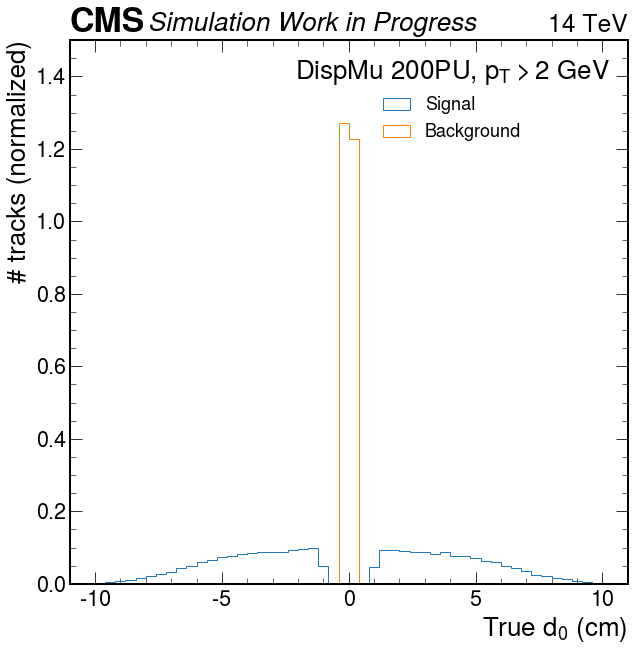

In [37]:
signal = tp_d0DM[(abs(matchtrk_d0DM)>1) & (tp_nmatchDM>0) & (tp_eventidDM==0) & (abs(tp_d0DM)>0.8)]
background = trk_matchtp_d0NG[(abs(trk_d0NG)>1) & (trk_fakeNG>0) & (abs(trk_matchtp_d0NG)<0.1)]

plt.hist(signal,bins=50,range=(-10,10),histtype='step',label='Signal',weights=np.ones_like(signal)/9000,density=True)
plt.hist(background,bins=50,range=(-10,10),histtype='step',label='Background',weights=np.ones_like(background)/10000,density=True)
plt.xlabel('True $d_0$ (cm)')
plt.ylabel('# tracks (normalized)')
plt.legend(loc='best',fontsize='x-small',title='DispMu 200PU, $p_{T}>2$ GeV')
plt.ylim(0,1.5)
#plt.yscale('log') #if you want the y axis on log scale
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
plt.show()

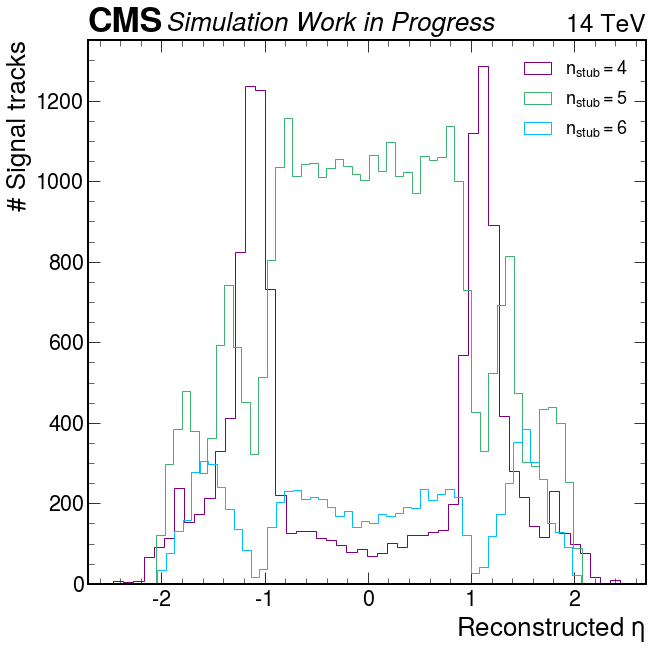

In [38]:
signal_eta = matchtrk_etaDM[(abs(matchtrk_d0DM)>1) & (tp_nmatchDM>0) & (tp_eventidDM==0) & (abs(tp_d0DM)>0.8)]
signal_nstub = matchtrk_nstubDM[(abs(matchtrk_d0DM)>1) & (tp_nmatchDM>0) & (tp_eventidDM==0) & (abs(tp_d0DM)>0.8)]


nstub4 = signal_eta[signal_nstub==4]
nstub5 = signal_eta[signal_nstub==5]
nstub6 = signal_eta[signal_nstub==6]

values = [nstub4,nstub5,nstub6]

plt.hist(nstub4, bins=50, label='$n_{stub} =4$', histtype='step', color='purple')
plt.hist(nstub5, bins=50, label='$n_{stub} =5$', histtype='step', color='mediumseagreen')
plt.hist(nstub6, bins=50, label='$n_{stub} =6$', histtype='step', color='deepskyblue')


plt.xlabel('Reconstructed $\eta$')
plt.ylabel('# Signal tracks')
plt.legend(loc=1,fontsize='x-small')
#plt.ylim(0,1100)
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

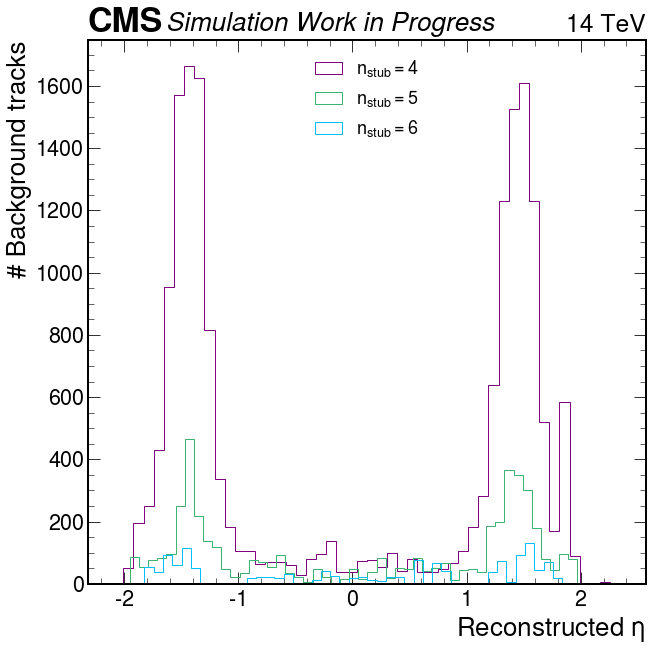

In [39]:
background_eta = trk_etaNG[(abs(trk_d0NG)>1) & (trk_fakeNG>0) & (abs(trk_matchtp_d0NG)<0.1)]
background_nstub = trk_nstubNG[(abs(trk_d0NG)>1) & (trk_fakeNG>0) & (abs(trk_matchtp_d0NG)<0.1)]

nstub4 = background_eta[background_nstub==4]
nstub5 = background_eta[background_nstub==5]
nstub6 = background_eta[background_nstub==6]

values = [nstub4,nstub5,nstub6]
label = ['nstub4','nstub5','nstub6']

plt.hist(nstub4, bins=50, label='$n_{stub} =4$', histtype='step', color='purple')
plt.hist(nstub5, bins=50, label='$n_{stub} =5$', histtype='step', color='mediumseagreen')
plt.hist(nstub6, bins=50, label='$n_{stub} =6$', histtype='step', color='deepskyblue')

plt.xlabel('Reconstructed $\eta$')
plt.ylabel('# Background tracks')
plt.legend(loc=9,fontsize='x-small')
#plt.ylim(0,200)
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

# Preprocessing  

In [ ]:
def calcmisslayer(hitpat):
    nlaymiss = np.zeros(len(hitpat))
    for i in range(len(hitpat)):
        bin_hitpat = np.binary_repr(hitpat[i]) #can set this to fixed width with "width=n"
        bin_hitpat = bin_hitpat.strip('0') #take out all 0 at beginning and end
        nlaymiss[i] = bin_hitpat.count('0') 
    return nlaymiss

In [ ]:
nlaymissNG = calcmisslayer(arraysNG['trk_hitpattern'].flatten())
nlaymissDM = calcmisslayer(arraysDM['matchtrk_hitpattern'].flatten())
nlaymissGGH = calcmisslayer(arraysGGH['matchtrk_hitpattern'].flatten())

In [ ]:
features = ['trk_eta','trk_bendchi2','trk_nstub','trk_phi','trk_z0','trk_chi2rphi','trk_chi2rz']

X_NG = np.empty((len(arraysNG[features[0]].flatten()),len(features)))
for i in range(len(features)):
    X_NG[:,i] = arraysNG[features[i]].flatten()
X_NG = np.concatenate((X_NG,nlaymissNG.reshape(-1,1)),axis=1)
    
features = ['matchtrk_eta','matchtrk_bendchi2','matchtrk_nstub','matchtrk_phi','matchtrk_z0','matchtrk_chi2rphi','matchtrk_chi2rz']
    
X_DM = np.empty((len(arraysDM[features[0]].flatten()),len(features)))
for i in range(len(features)):
    X_DM[:,i] = arraysDM[features[i]].flatten()
X_DM = np.concatenate((X_DM,nlaymissDM.reshape(-1,1)),axis=1)

X_GGH = np.empty((len(arraysGGH[features[0]].flatten()),len(features)))
for i in range(len(features)):
    X_GGH[:,i] = arraysGGH[features[i]].flatten()
#X_GGH = np.concatenate((X_GGH,nlaymissGGH.reshape(-1,1)),axis=1)


In [ ]:
#find_nan = np.argwhere(np.isnan(X))
X_NG = np.delete(X_NG, np.argwhere(np.isnan(X_NG))[:,0], 0)

X_DM = np.delete(X_DM, np.argwhere(np.isnan(X_DM))[:,0], 0)

X_GGH = np.delete(X_GGH, np.argwhere(np.isnan(X_GGH))[:,0], 0)


In [ ]:
y_NG = np.zeros(len(X_NG))

y_DM = np.ones(len(X_DM))

y_GGH = np.ones(len(X_GGH))

In [ ]:
#set signal and background cuts
background = ((abs(trk_d0NG)>1) & (trk_fakeNG>0) & (abs(trk_matchtp_d0NG)<0.1))
signal = ((abs(matchtrk_d0DM)>1) & (tp_nmatchDM>0) & (tp_eventidDM==0) & (abs(tp_d0DM)>0.8))
#signalGGH = ((abs(matchtrk_d0GGH)>1) & (tp_nmatchGGH>0) & (tp_eventidGGH==0) & (abs(tp_d0GGH)>0.8))

n = min(len(y_NG[background]),len(y_DM[signal]))


In [ ]:
X_NG = X_NG[background]
y_NG = y_NG[background]
X_DM = X_DM[signal]
y_DM = y_DM[signal]

In [ ]:
#shuffle of X and y
X_NG, y_NG = shuffle(X_NG, y_NG, random_state=0)
X_DM, y_DM = shuffle(X_DM, y_DM, random_state=0)
X_GGH, y_GGH = shuffle(X_GGH, y_GGH, random_state=0)

In [ ]:
X_train = np.concatenate((X_NG[:math.trunc(.8*n)],X_DM[:math.trunc(.8*n)]))
y_train = np.concatenate((y_NG[:math.trunc(.8*n)],y_DM[:math.trunc(.8*n)]))

In [ ]:
X_test = np.concatenate((X_NG[math.trunc(.8*n):n],X_DM[math.trunc(.8*n):n]))
y_test = np.concatenate((y_NG[math.trunc(.8*n):n],y_DM[math.trunc(.8*n):n]))

In [ ]:
#cut-based classification to compare the GBDT to
y_pred = abs(X_test[:,0])<1
sig = y_pred[y_test==1]
back = y_pred[y_test==0]
tpr_eta = np.sum(sig)/len(sig)
fpr_eta = np.sum(back)/len(back)

y_pred = abs(X_test[:,2])>4
sig = y_pred[y_test==1]
back = y_pred[y_test==0]
tpr_nstub = np.sum(sig)/len(sig)
fpr_nstub = np.sum(back)/len(back)


# Train

In [ ]:
#GBDT train model

#using all features
clf_GBDT = GradientBoostingClassifier(n_estimators=100, max_depth=3)
clf_GBDT.fit(X_train,y_train)

#using 6 most important features
clf_GBDT_2 = GradientBoostingClassifier(n_estimators=100, max_depth=3)
clf_GBDT_2.fit(X_train[:,[0,1,2,4,5,6]],y_train)

#using 5 most important features
clf_GBDT_3 = GradientBoostingClassifier(n_estimators=100, max_depth=3)
clf_GBDT_3.fit(X_train[:,[0,1,2,4,5]],y_train)


GradientBoostingClassifier()

# Evaluate Model

### Define Claire's functions

In [ ]:
def get_eff_faker_vs_feat(feat_interest, feat, X, y, fit_clf, thresh=.5):
    
    if feat_interest=='pt':  
        bins = np.logspace(1.3,2,12) #2 to 100 GeV in log bins
    if feat_interest=='eta':   
        bins = np.linspace(-2.5,2.5,20)
    if feat_interest=='phi':   
        bins = np.linspace(-2.5,2.5,30)
    if feat_interest=='z0':   
        bins = np.linspace(-10,10,120)
    # add another feature to study here

    eff = np.zeros(len(bins))
    faker = np.zeros(len(bins))
    err_eff = np.zeros(len(bins))
    err_faker = np.zeros(len(bins))
            
    for ii in range(len(bins)):
        idx_temp = np.digitize(feat,bins,right=True)==ii
        X_temp = X[idx_temp]
        y_temp = y[idx_temp]
        if len(X_temp)>0:
            try: #works for keras
                y_pred = (fit_clf.predict(X_temp)[:,0]>thresh)*1
            except: #works for sklearn & xgboost
                y_pred = (fit_clf.predict_proba(X_temp)[:,1]>thresh)*1
            eff[ii], faker[ii], err_eff[ii], err_faker[ii] = get_eff_faker_err(y_pred,y_temp)

    return bins, eff, faker, err_eff, err_faker

def get_eff_faker_err(y_pred, y_true):

    # efficiency = (# reals labeled real)/(# reals) <-this is really TPR
    TP = (y_pred[y_true==1]==1).sum()
    reals = len(y_true[y_true==1])
    eff = TP/reals
    err_eff = np.sqrt(TP*(reals-TP)/reals**3)

    if y_true.all()==1:
        return eff, 0, err_eff, 0
    
    # fake rate = (# fakes labeled real)/(#fakes) <-this is really FPR
    FP = (y_pred[y_true==0]==1).sum()
    fakes = len(y_true[y_true==0])
    faker = FP/fakes
    err_faker = np.sqrt(FP*(fakes-FP)/fakes**3)
    
    return eff, faker, err_eff, err_faker


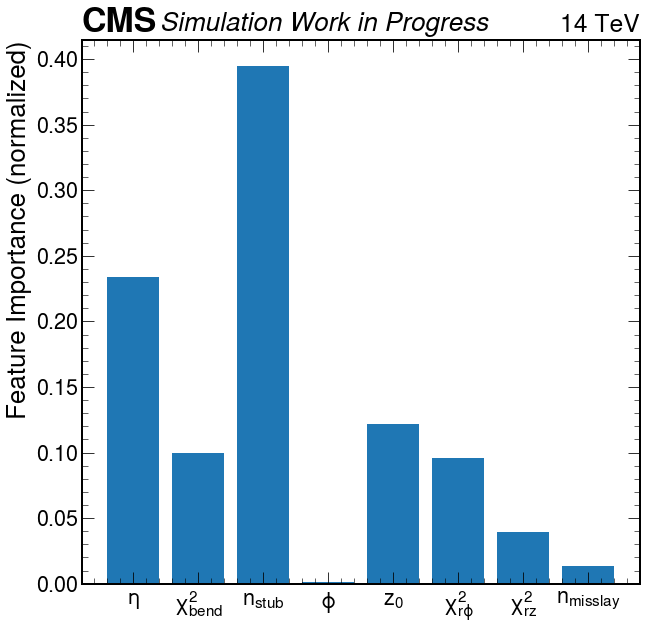

In [ ]:
features = ['$\eta$','$\chi^2_{bend}$','$n_{stub}$','$\phi$','$z_0$','$\chi^2_{r\phi}$','$\chi^2_{rz}$','$n_{misslay}$']

plt.bar(range(len(features)),height=clf_GBDT.feature_importances_,tick_label=features)
plt.ylabel('Feature Importance (normalized)')
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
plt.show()

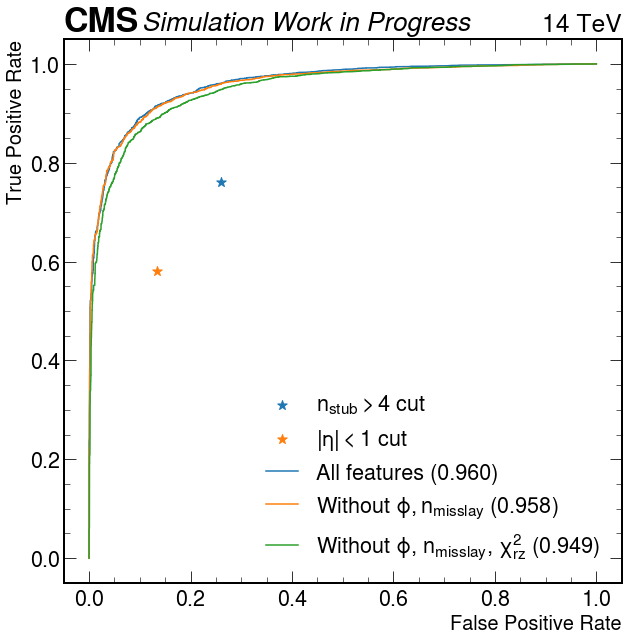

In [23]:
# Create roc curve with AUC value

#cut-based
plt.scatter(fpr_nstub, tpr_nstub, label=r'$n_{stub}>4$ cut',marker='*', s=100)
plt.scatter(fpr_eta,tpr_eta, label=r"$|\eta|<1$ cut", marker='*', s=100)

# all features
y_pred = clf_GBDT.predict_proba(X_test)[:,1]
fpr, tpr, dt = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=r'All features (%0.3f)' % auc)

# 6 features
y_pred = clf_GBDT_2.predict_proba(X_test[:,[0,1,2,4,5,6]])[:,1]
fpr, tpr, dt = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=r"Without $\phi, n_{misslay}$ (%0.3f)" % auc)

# 5 features
y_pred = clf_GBDT_3.predict_proba(X_test[:,[0,1,2,4,5]])[:,1]
fpr, tpr, dt = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label=r"Without $\phi$, $n_{misslay}$, $\chi^2_{rz}$ (%0.3f)" % auc)


#compare to train set
y_pred = clf_GBDT.predict_proba(X_train)[:,1]
fpr, tpr, dt = roc_curve(y_train,y_pred)
auc = roc_auc_score(y_train, y_pred)

#plt.plot(fpr,tpr,label="train")
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
plt.legend(loc='best')


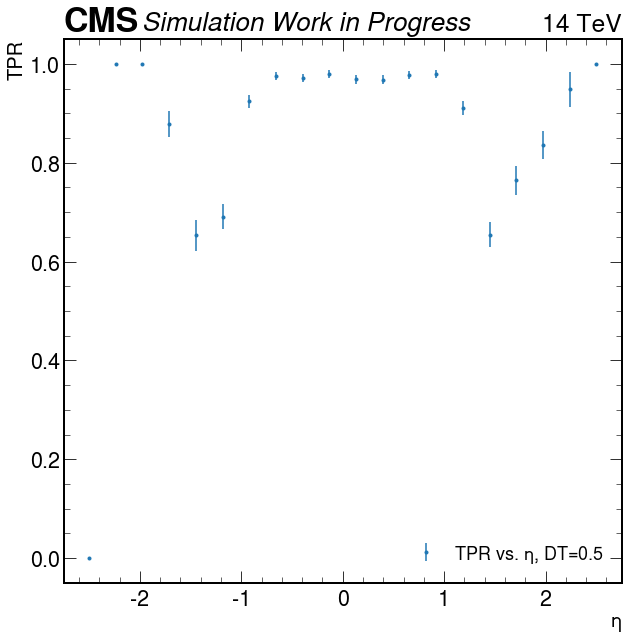

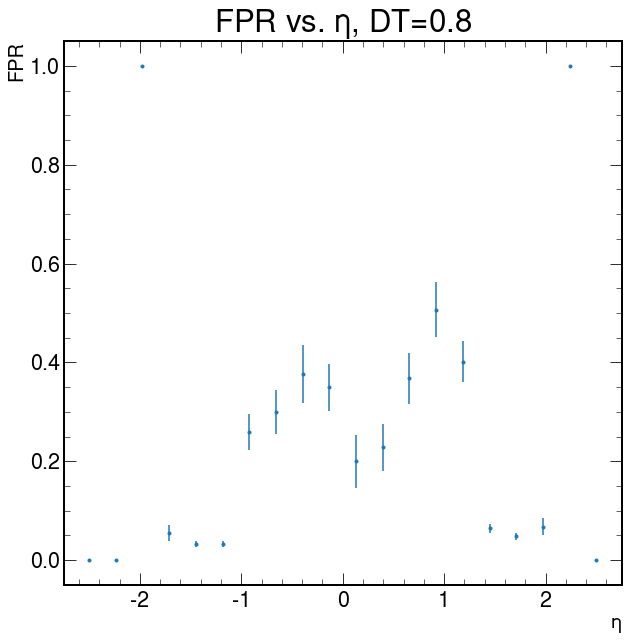

In [24]:
# Create TPR/FPR vs. eta
eta_test = X_test[:,0]

pt, eff, faker, err_eff, err_faker = get_eff_faker_vs_feat('eta',eta_test,X_test,y_test,clf_GBDT,thresh=0.5)

plt.errorbar(pt,eff,yerr=err_eff,linestyle='None',fmt='.',label='TPR vs. $\eta$, DT=0.5')
plt.xlabel('$\eta$',fontsize=20)
plt.ylabel('TPR',fontsize=20)
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
plt.legend(loc='best',fontsize='x-small')
plt.show()

plt.errorbar(pt,faker,yerr=err_faker,linestyle='None',fmt='.')
plt.xlabel('$\eta$',fontsize=20)
plt.ylabel('FPR',fontsize=20)
plt.title("FPR vs. $\eta$, DT=0.8")
plt.show()

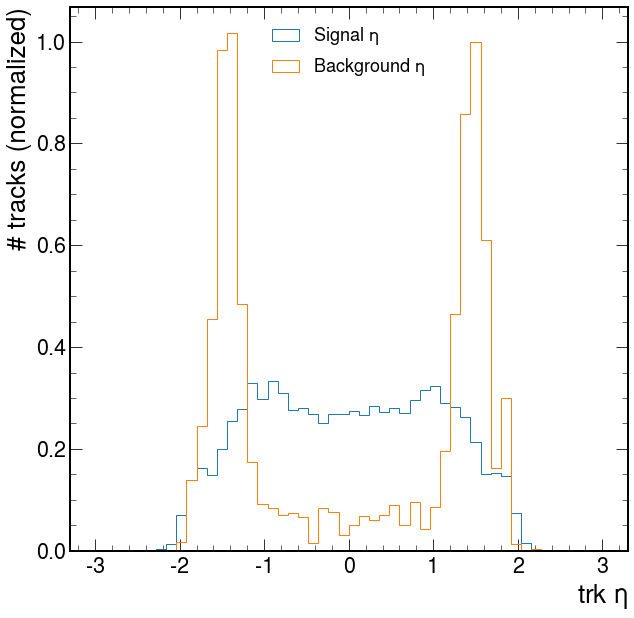

In [25]:
signal_eta = X_train[:,0][y_train==1]
background_eta = X_train[:,0][y_train==0]

plt.hist(signal_eta,bins=50,range=(-3,3),histtype='step',label='Signal $\eta$',density=True)
plt.hist(background_eta,bins=50,range=(-3,3),histtype='step',label='Background $\eta$',density=True)
plt.xlabel('trk $\eta$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=9,fontsize='x-small')
#plt.ylim(0,1.5)
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

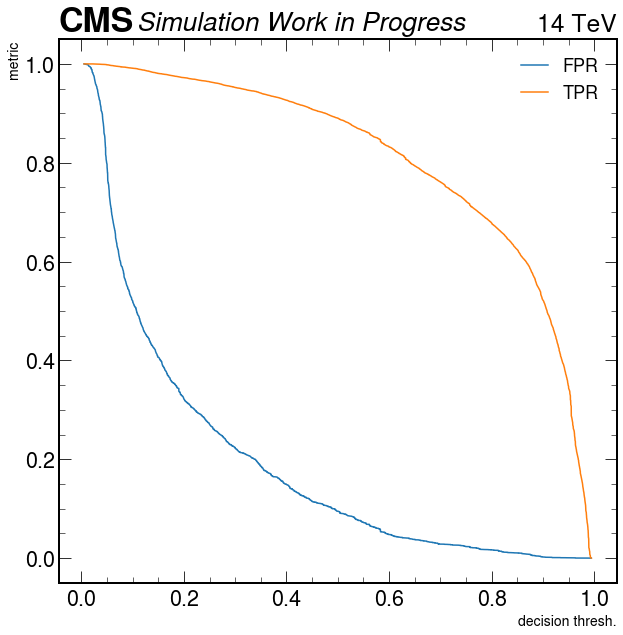

In [26]:
# Plot TPR and FPR vs decision threshold (dt)

plt.plot(dt[1:],fpr[1:],label='FPR')
plt.plot(dt[1:],tpr[1:],label='TPR')
plt.xlabel('decision thresh.',fontsize=14)
plt.ylabel('metric',fontsize=14)
plt.legend(loc='best')
#plt.title("TPR and FPR vs decision threshold (ideal)")
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
plt.legend(loc='best',fontsize='x-small')
plt.show()


#plt.plot(tpr[1:],fpr[1:],label='FPR')


### Eta investigation

In [27]:
def get_eff_faker_vs_feat_bindt(feat_interest, feat, X, y, fit_clf, eta_feat, t_fpr=None, t_tpr=None, eta_bins=np.linspace(0,2.1,15)):
    
    if feat_interest=='pt':  
        #feat_bins = np.logspace(0.3,2,12) #2 to 100 GeV in log bins
        feat_bins = np.logspace(1,2,12) #10 to 100 GeV in log bins
    if feat_interest=='eta':   
        feat_bins = np.linspace(0,2.1,8)
    if feat_interest=='d0':  
        #bins = np.linspace(0,10,20)
        feat_bins = np.linspace(1,10,18) #trained on displaced trks
    if feat_interest=='phi':   
        feat_bins = np.linspace(-np.pi,np.pi,20)
    if feat_interest=='nonantphi':   
        feat_bins = np.linspace(-np.pi/9,np.pi/9,20)
    if feat_interest=='seed':   
        feat_bins = np.linspace(0,12,13)
    # add another feature to study here

    eff = np.ones(len(feat_bins)-1) * -1
    faker = np.ones(len(feat_bins)-1) * -1
    err_eff = np.zeros(len(feat_bins)-1)
    err_faker = np.zeros(len(feat_bins)-1)
    
    # bin decision thresholds based on d0 bins
    eta_bins = eta_bins #can change d0 binning for dt
    idx_dts = np.digitize(eta_feat,eta_bins,right=True)
    dts = np.zeros_like(idx_dts,dtype=float)
    for ii in range(len(eta_bins)):
        X_temp = X[idx_dts==ii]
        y_temp = y[idx_dts==ii]
        if len(X_temp)>0:
            y_pred = fit_clf.predict_proba(X_temp)[:,1]
            fpr, tpr, dt = roc_curve(y_temp,y_pred)
            if t_fpr:
                dts[idx_dts==ii] = dt[np.argmin(abs(fpr-t_fpr))]
            elif t_tpr:
                dts[idx_dts==ii] = dt[np.argmin(abs(tpr-t_tpr))]
            else:
                print('No tpr/fpr provided for binning')
                return

    for ii in range(1,len(feat_bins)):
        idx_temp = np.digitize(feat,feat_bins,right=True)==ii
        X_temp = X[idx_temp]
        y_temp = y[idx_temp]
        dt_temp = dts[idx_temp]
        if len(X_temp)>0:
            y_pred = (fit_clf.predict_proba(X_temp)[:,1]>=dt_temp)*1
            eff[ii-1], faker[ii-1], err_eff[ii-1], err_faker[ii-1] = get_eff_faker_err(y_pred,y_temp)
            
    # correct bin to be centered and error is bin width
    bins = [(feat_bins[i]+feat_bins[i+1])/2 for i in range(len(feat_bins)-1)]
    bins_err = [(feat_bins[i+1]-feat_bins[i])/2 for i in range(len(feat_bins)-1)]

    return bins, bins_err, eff, faker, err_eff, err_faker

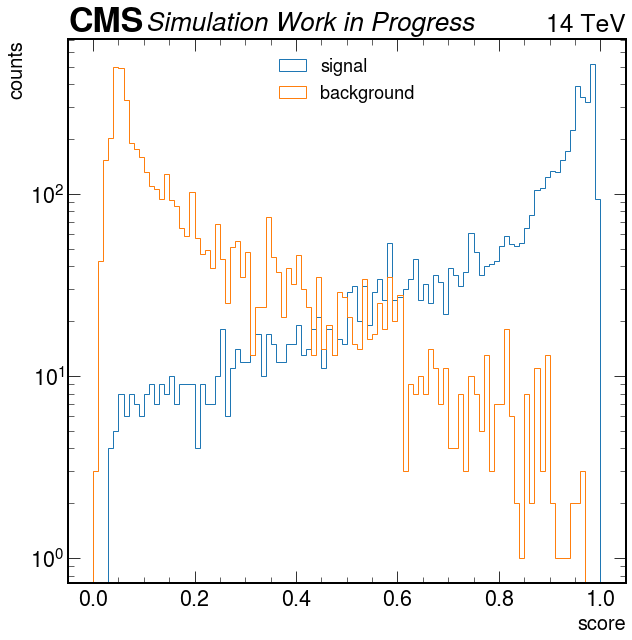

In [28]:
#plt.hist(dt,range=(0,1),bins=100,histtype="step")
eta_cut = ((X_test[:,0]>0.9) & (X_test[:,0]<1.2))
eta_cut1 = ((X_test[:,0]>0) & (X_test[:,0]<0.15))

y_pred = clf_GBDT.predict_proba(X_test)[:,1]

plt.hist(y_pred[y_test==1],range=(0,1),bins=100,histtype="step",label="signal")
plt.hist(y_pred[y_test==0],range=(0,1),bins=100,histtype="step",label="background")
plt.xlabel('score',fontsize=20)
plt.ylabel('counts',fontsize=20)
plt.yscale('log') 
plt.legend(loc=3)
#plt.title('$0.9<\eta<1.2$')
hep.cms.label(llabel="Simulation Work in Progress", rlabel="14 TeV")
plt.legend(loc=9,fontsize='x-small')
plt.show()

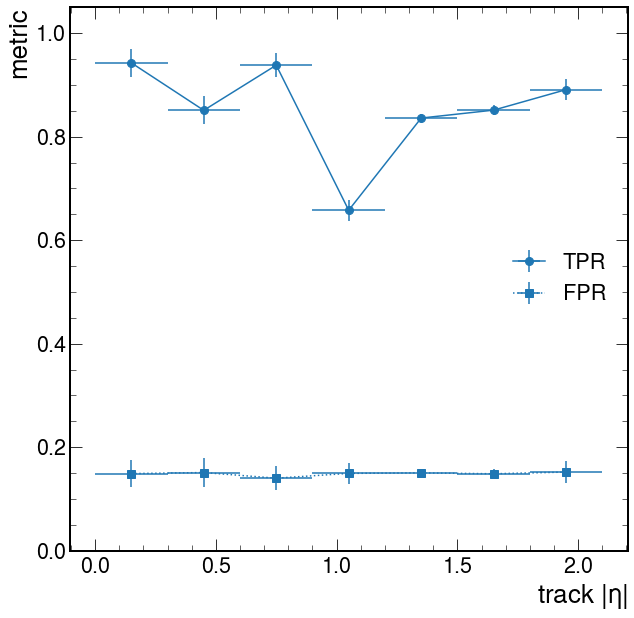

In [29]:
feat, feat_err, eff, faker, err_eff, err_faker = get_eff_faker_vs_feat_bindt('eta',abs(X_test[:,0]),X_test,
                                                                             y_test,clf_GBDT,abs(X_test[:,0]),t_fpr=0.15)
plt.errorbar(feat,eff,xerr=feat_err,yerr=err_faker,linestyle='-',fmt='o',markersize=8,label='TPR',color='C0')
plt.errorbar(feat,faker,xerr=feat_err,yerr=err_faker,linestyle=':',fmt='s',markersize=8,label='FPR',color='C0')
#feat, feat_err, eff, faker, err_eff, err_faker = get_eff_faker_vs_feat_bindt('d0',abs(X_test_bin[:,8]),X_test_bin[:,[1,2,3,4,5,6,7,8,13]],
#                                                                            y_test,clf_GBDT_nonphi,abs(X_test_bin[:,8]),t_fpr=0.15)
#plt.errorbar(feat,eff,xerr=feat_err,yerr=err_faker,linestyle='-',fmt='o',markersize=8,label='TPR, nonant phi',color='C1')
#plt.errorbar(feat,faker,xerr=feat_err,yerr=err_faker,linestyle=':',fmt='s',markersize=8,label='FPR, nonant phi',color='C1')
plt.xlabel('track |$\eta$|')
plt.ylabel('metric')
plt.legend(loc='best')
plt.ylim(0,1.05)
plt.show()

### Plotting features in train set

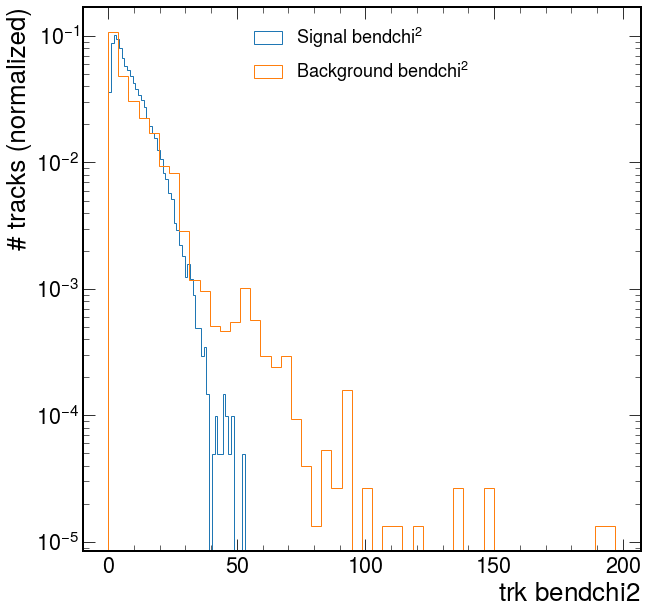

In [30]:
signal_bendchi2 = X_train[:,1][y_train==1]
background_bendchi2 = X_train[:,1][y_train==0]

plt.hist(signal_bendchi2,bins=50,histtype='step',label='Signal $bend chi^2$',density=True)
plt.hist(background_bendchi2,bins=50,histtype='step',label='Background $bend chi^2$',density=True)
plt.xlabel('trk $bend chi2$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=9,fontsize='x-small')
#plt.ylim(0,1.5)
plt.yscale('log') #if you want the y axis on log scale
plt.show()

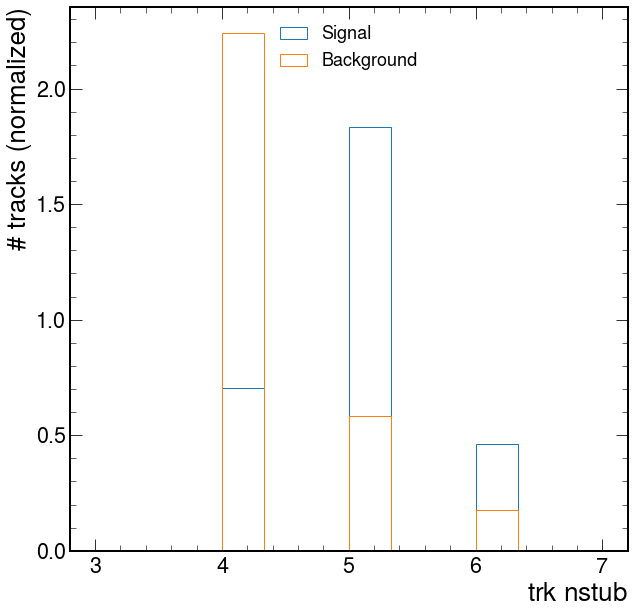

In [31]:
signal_nstub = X_train[:,2][y_train==1]
background_nstub = X_train[:,2][y_train==0]

plt.hist(signal_nstub,bins=12,range=(3,7),histtype='step',label='Signal',density=True)
plt.hist(background_nstub,bins=12,range=(3,7),histtype='step',label='Background',density=True)
plt.xlabel('trk $nstub$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=9,fontsize='x-small')
#plt.ylim(0,1.5)
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

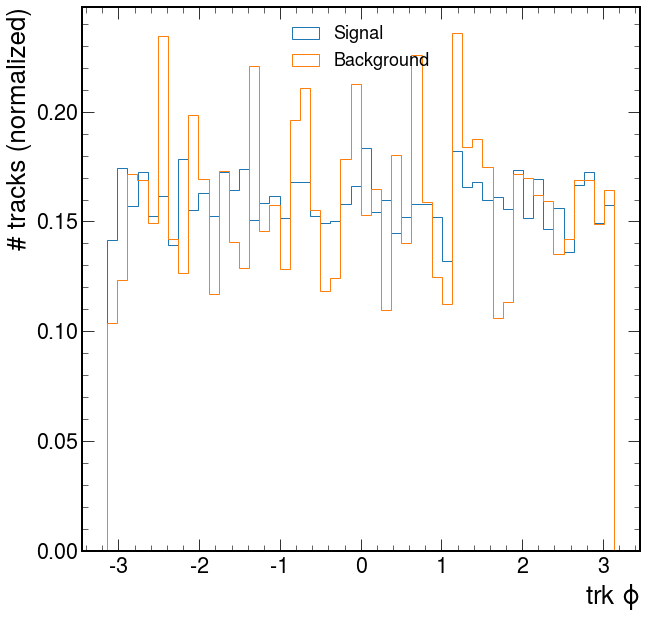

In [32]:
signal_phi = X_train[:,3][y_train==1]
background_phi = X_train[:,3][y_train==0]

plt.hist(signal_phi,bins=50,histtype='step',label='Signal',density=True)
plt.hist(background_phi,bins=50,histtype='step',label='Background',density=True)
plt.xlabel('trk $\phi$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=9,fontsize='x-small')
#plt.ylim(0,1.5)
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

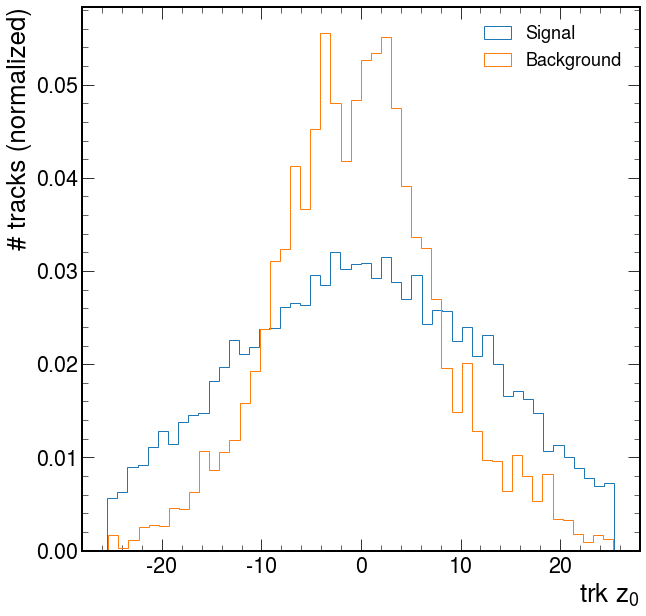

In [33]:
signal_z0 = X_train[:,4][y_train==1]
background_z0 = X_train[:,4][y_train==0]

plt.hist(signal_z0,bins=50,histtype='step',label='Signal',density=True)
plt.hist(background_z0,bins=50,histtype='step',label='Background',density=True)
plt.xlabel('trk $z_0$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=1,fontsize='x-small')
#plt.ylim(0,1.5)
#plt.yscale('log') #if you want the y axis on log scale
plt.show()

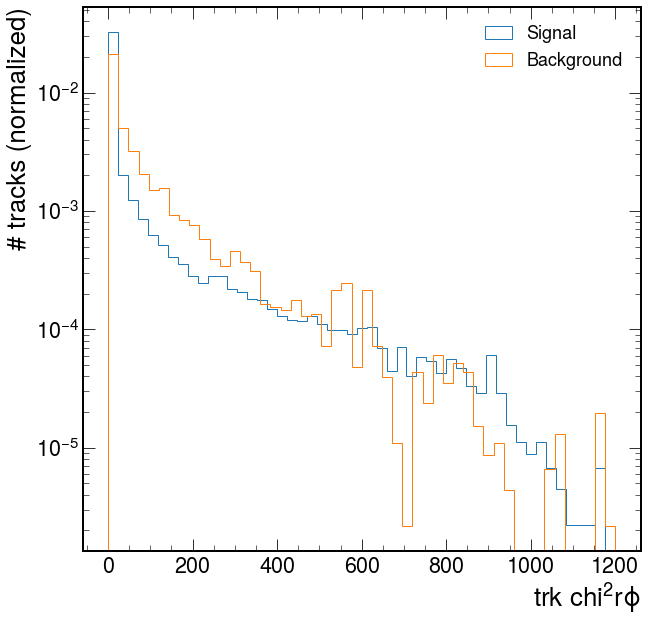

In [34]:
signal_chi2rphi = X_train[:,5][y_train==1]
background_chi2rphi = X_train[:,5][y_train==0]

plt.hist(signal_chi2rphi,bins=50,histtype='step',label='Signal',density=True)
plt.hist(background_chi2rphi,bins=50,histtype='step',label='Background',density=True)
plt.xlabel('trk $chi^2 r\phi$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=1,fontsize='x-small')
#plt.ylim(0,1.5)
plt.yscale('log') #if you want the y axis on log scale
plt.show()

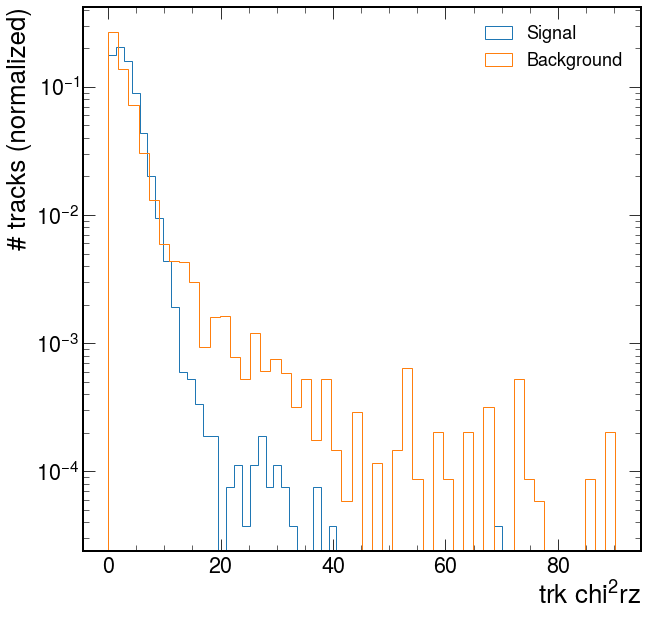

In [35]:
signal_chi2rz = X_train[:,6][y_train==1]
background_chi2rz = X_train[:,6][y_train==0]

plt.hist(signal_chi2rz,bins=50,histtype='step',label='Signal',density=True)
plt.hist(background_chi2rz,bins=50,histtype='step',label='Background',density=True)
plt.xlabel('trk $chi^2 rz$')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=1,fontsize='x-small')
#plt.ylim(0,1.5)
plt.yscale('log') #if you want the y axis on log scale
plt.show()

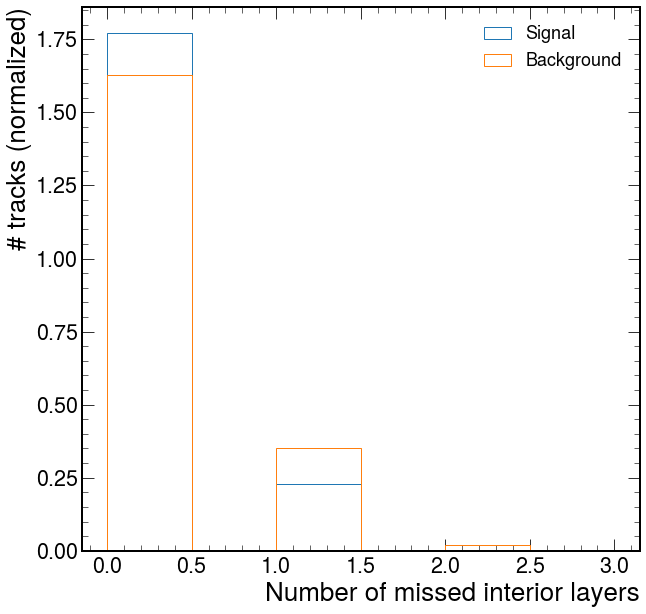

In [36]:
signal_misslay = X_train[:,7][y_train==1]
background_misslay = X_train[:,7][y_train==0]

plt.hist(signal_misslay,bins=6,range=(0,3),histtype='step',label='Signal',density=True)
plt.hist(background_misslay,bins=6,range=(0,3),histtype='step',label='Background',density=True)
plt.xlabel('Number of missed interior layers')
plt.ylabel('# tracks (normalized)')
plt.legend(loc=1,fontsize='x-small')
#plt.ylim(0,1.5)
#plt.yscale('log') #if you want the y axis on log scale
plt.show()